<a id=top-page></a>
# `pykitPIV` demo: Postprocess images

In this Jupyter notebook, we show how functionalities from the ``Postprocess`` class can be used to postprocess PIV images.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
import cmcrameri.cm as cmc
from pykitPIV import Image, Postprocess, Particle, FlowField

2025-05-15 10:41:24.305327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
figsize = (10,10)

<a id=upload></a>
***

## Post-process saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [4]:
image = Image()

In [5]:
images_tensor_dic = image.upload_from_h5(filename='../docs/data/pykitPIV-dataset-10-PIV-pairs-256-by-256.h5')
images_tensor = images_tensor_dic['I']
images_tensor.shape

(10, 2, 256, 256)

### Pass an image tensor of size $(N, 2, H, W)$

In [6]:
postprocess = Postprocess(images_tensor)

Check that the image pair has been passed and not just one image:

In [7]:
postprocess.image_pair

True

First, we add Gaussian noise to the images:

In [8]:
postprocess.add_gaussian_noise(loc=0.0, 
                               scale=(100,200))

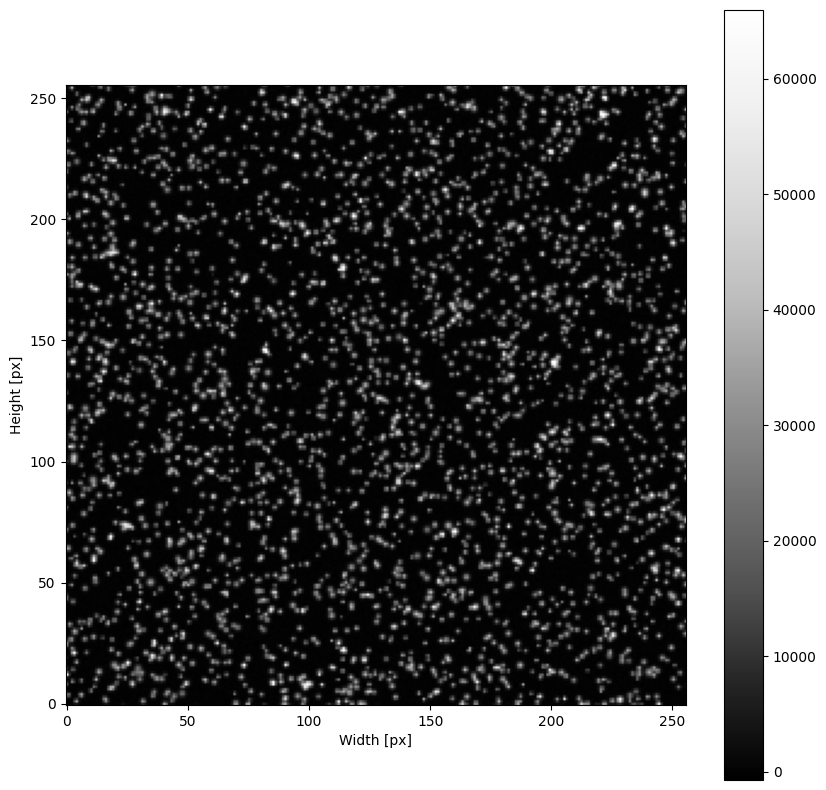

In [9]:
plt = postprocess.plot(original=False,
                 idx=2,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=figsize)

plt.colorbar()

In [10]:
np.min(postprocess.processed_image_tensor)

-801.789652404723

Second, we perform a log-transformation of the images with the noise added:

In [11]:
postprocess.log_transform_images(addition=1000)

In [12]:
postprocess.processed_image_tensor.shape

(10, 2, 256, 256)

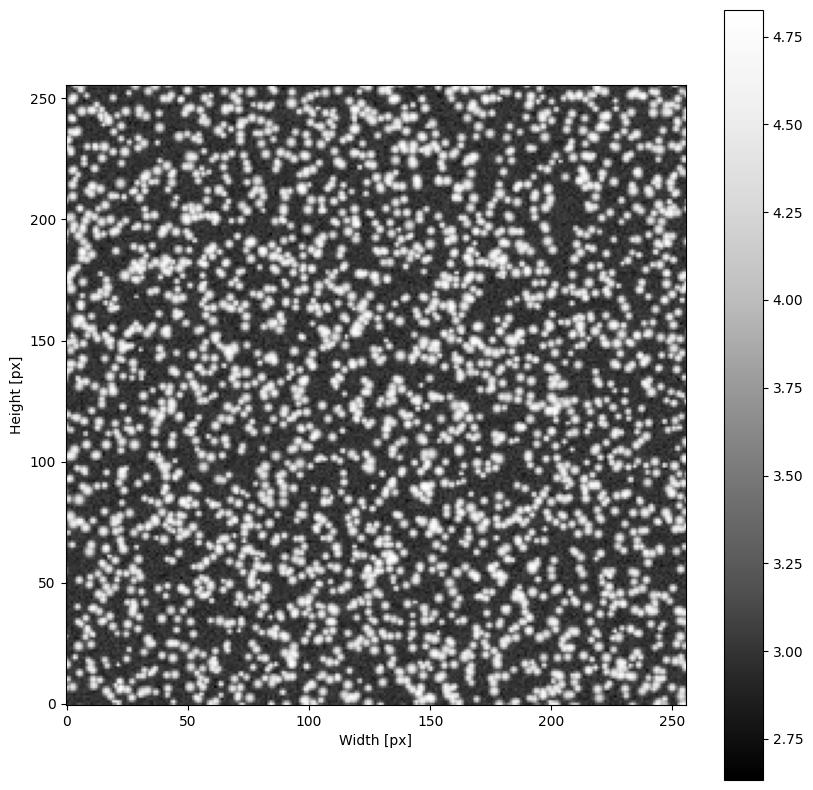

In [13]:
plt = postprocess.plot(original=False,
                 idx=0,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=figsize);

plt.colorbar()

### Pass an image tensor of size $(N, H, W)$

In [14]:
postprocess = Postprocess(images_tensor[:,0,:,:])

Check that single image instances, $I_1$, have been passed:

In [15]:
postprocess.image_pair

False

Perform a log-transformation of the images:

In [16]:
postprocess.log_transform_images(addition=1000)

In [17]:
postprocess.processed_image_tensor.shape

(10, 256, 256)

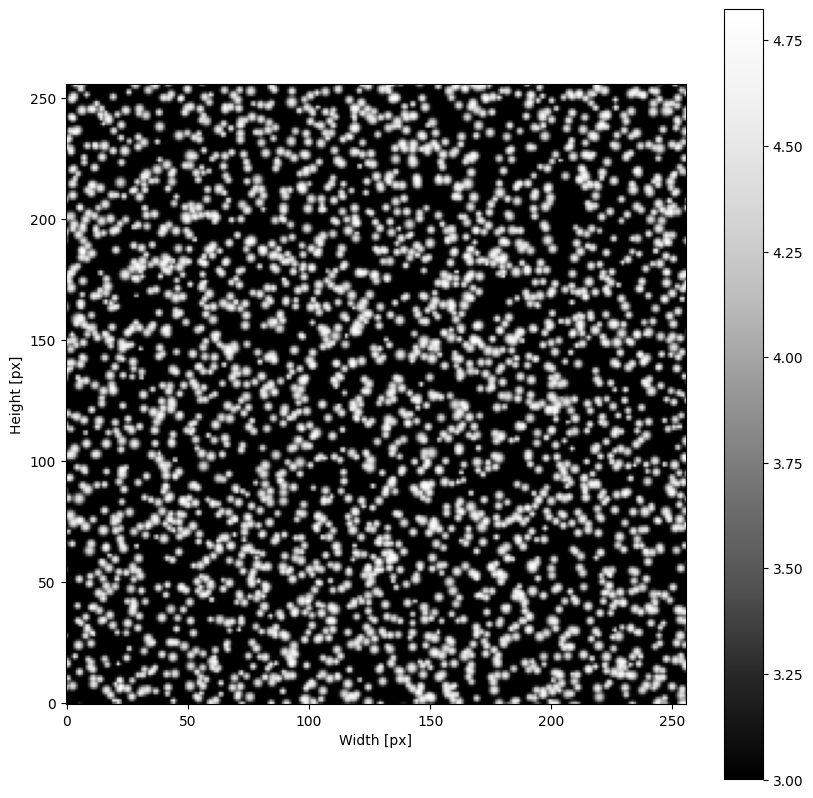

In [18]:
plt = postprocess.plot(original=False,
                 idx=0,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=figsize)

plt.colorbar()

Add Gaussian noise to the log-transformed images:

In [19]:
postprocess.add_gaussian_noise(loc=0.0, 
                               scale=(0.1,0.2))

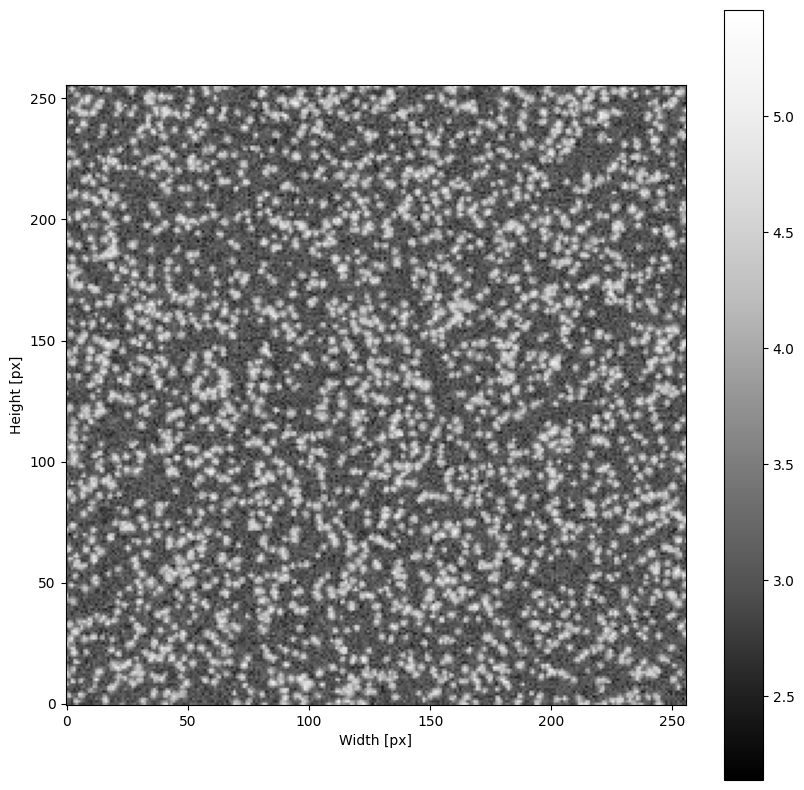

In [20]:
plt = postprocess.plot(original=False,
                 idx=2,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=figsize)

plt.colorbar()

***

## Post-process on-the-fly user-created dataset

***

## Add shot noise and Gaussian noise to images

[Go to the top](#top-page)

In [21]:
n_images = 1
image_size = (50, 50)
size_buffer = 0
figsize=(4,4)

In [22]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=4,
                     densities=0.05,
                     diameter_std=0,
                     seeding_mode='random', 
                     random_seed=100)

In [23]:
image = Image(random_seed=100)

In [24]:
image.add_particles(particles)

In [25]:
image.add_reflected_light(exposures=(0.99,0.99),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/8)

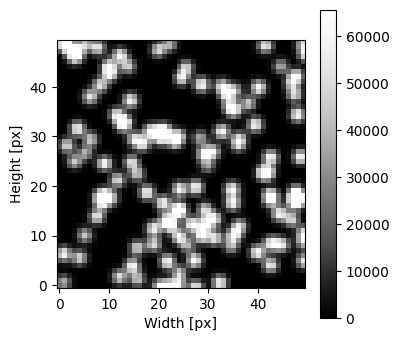

In [26]:
plt = image.plot(0, 
                 with_buffer=True,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 origin='lower',
                 figsize=figsize)

plt.colorbar()

In [27]:
images_tensor = image.images_I1[:,0,:,:]

In [28]:
images_tensor.shape

(1, 50, 50)

In [29]:
postprocess = Postprocess(images_tensor, 
                          random_seed=100)

First, we add Gaussian noise to the images:

In [30]:
postprocess.add_shot_noise(strength=1,
                           clip=2**16-1)

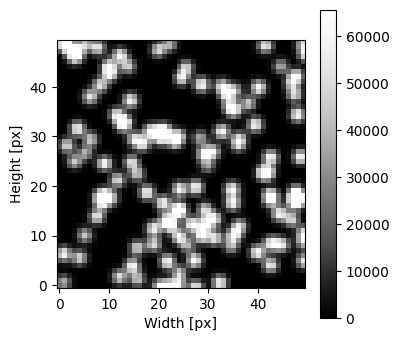

In [31]:
plt = postprocess.plot(original=True,
                 idx=0,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=figsize)

plt.colorbar()

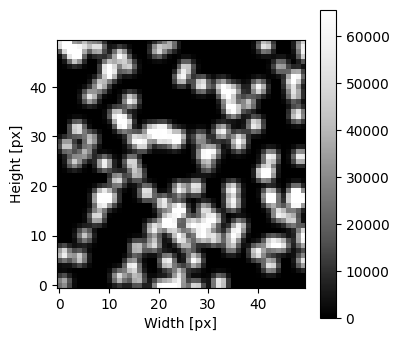

In [32]:
plt = postprocess.plot(original=False,
                       idx=0,
                       instance=1,
                       xlabel='Width [px]',
                       ylabel='Height [px]',
                       cmap='Greys_r',
                       vmin=0,
                       vmax=2**16-1,
                       figsize=figsize)

plt.colorbar()

In [33]:
np.min(postprocess.processed_image_tensor)

0.0

In [34]:
np.max(postprocess.processed_image_tensor)

65535.0

Add Gaussian noise atop the shot noise:

In [35]:
postprocess.add_gaussian_noise(loc=0.0,
                               scale=10000,
                               clip=2**16-1)

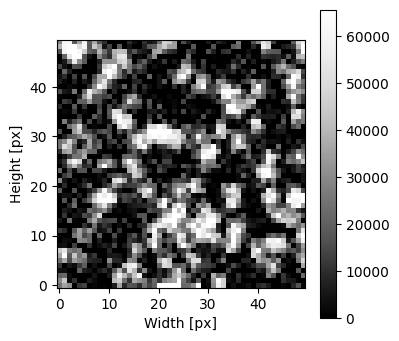

In [36]:
plt = postprocess.plot(original=False,
                       idx=0,
                       instance=1,
                       xlabel='Width [px]',
                       ylabel='Height [px]',
                       cmap='Greys_r',
                       figsize=figsize)

plt.colorbar()

In [37]:
np.min(postprocess.processed_image_tensor)

0.0

In [38]:
np.max(postprocess.processed_image_tensor)

65535.0

In [39]:
figsize=(6,3)

In [40]:
image = Image(random_seed=100)

In [41]:
flowfield = FlowField(1,
                      size=(30,30),
                      size_buffer=0,
                      random_seed=100)

In [42]:
flowfield.generate_checkered_velocity_field(displacement=(0,2),
                                            m=8,
                                            n=8,
                                            rotation=None)

In [43]:
image.add_flowfield(flowfield)

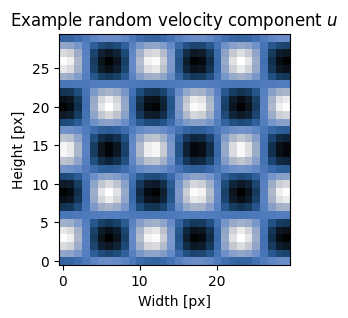

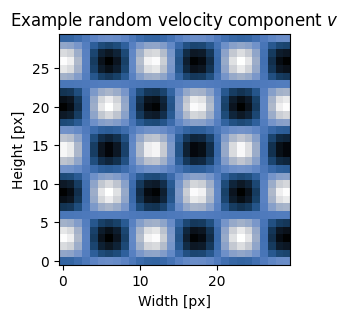

In [44]:
image.plot_field(0,
                  with_buffer=True,
                  xlabel='Width [px]',
                  ylabel='Height [px]',
                  title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                  cmap=cmc.oslo_r,
                  figsize=figsize);

In [45]:
image_tensor = flowfield.velocity_field[0][0][None,:,:]
image_tensor.shape

(1, 30, 30)

In [46]:
postprocess = Postprocess(image_tensor)

In [47]:
log_transformed_images_tensor = postprocess.log_transform_images(addition=10)

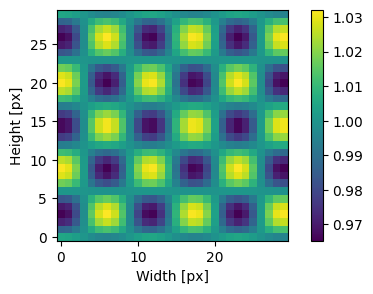

In [48]:
postprocess.plot(False,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=figsize);

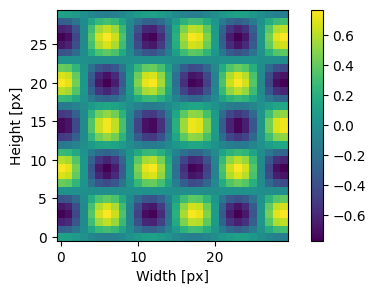

In [49]:
postprocess.plot(True,
                 0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 cbar=True,
                 figsize=figsize);

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)